In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import speech_recognition as sr
import pyttsx3

In [2]:
df=pd.read_csv("emotion_dataset_raw.csv")

In [3]:
df1=pd.read_csv("emotional text new.txt")
df1

,Emotion,Text
0,joy,I am feeling joyful! Life is wonderful.
1,sadness,I feel sad. Everything is going wrong.
2,fear,I am afraid. This is really frightening.
3,anger,I am angry! This is unacceptable.
4,surprise,I am surprised! I didn't see that coming.
...,...,...
1872,anger,Witnessing someone dismiss the importance of h...
1873,anger,I feel a surge of anger when someone perpetuat...
1874,anger,Dealing with the lack of accountability for en...
1875,anger,People who engage in discriminatory practices ...


In [4]:
data = pd.concat([df,df1], ignore_index=True)
data

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
36664,anger,Witnessing someone dismiss the importance of h...
36665,anger,I feel a surge of anger when someone perpetuat...
36666,anger,Dealing with the lack of accountability for en...
36667,anger,People who engage in discriminatory practices ...


In [5]:
data['Emotion'].value_counts()

Emotion
joy         11126
sadness      7347
fear         5938
anger        4619
surprise     4143
neutral      2335
disgust       936
shame         225
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

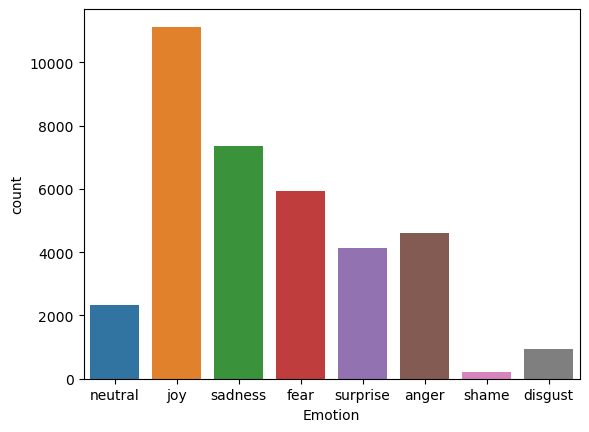

In [6]:
sns.countplot(x='Emotion',data=data)

In [7]:
selected_Emotion = ['joy', 'sadness','anger','surprise','neutral']
data_subset = data[data['Emotion'].isin(selected_Emotion)]
data_subset

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
36664,anger,Witnessing someone dismiss the importance of h...
36665,anger,I feel a surge of anger when someone perpetuat...
36666,anger,Dealing with the lack of accountability for en...
36667,anger,People who engage in discriminatory practices ...


In [8]:
import neattext.functions as nfx
data_subset['Clean_Text']=data_subset['Text'].apply(nfx.remove_userhandles)

C:\Users\nidha_5c\AppData\Local\Temp\ipykernel_17388\2256563778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Clean_Text']=data_subset['Text'].apply(nfx.remove_userhandles)


In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
data_subset['Clean_Text']=data_subset['Clean_Text'].apply(nfx.remove_stopwords)

C:\Users\nidha_5c\AppData\Local\Temp\ipykernel_17388\2281370954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Clean_Text']=data_subset['Clean_Text'].apply(nfx.remove_stopwords)


In [11]:
data_subset

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
36664,anger,Witnessing someone dismiss the importance of h...,Witnessing dismiss importance human rights dig...
36665,anger,I feel a surge of anger when someone perpetuat...,feel surge anger perpetuates harmful stereotyp...
36666,anger,Dealing with the lack of accountability for en...,Dealing lack accountability environmental dest...
36667,anger,People who engage in discriminatory practices ...,People engage discriminatory practices workpla...


In [12]:
x=data_subset['Clean_Text']
y=data_subset['Emotion']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

C:\Users\nidha_5c\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6712884680419344

In [16]:
svm_classifier = SVC(kernel='rbf', C=10, probability=True)

In [17]:
count_vectorizer = CountVectorizer()

In [18]:
pipe_svm = Pipeline([
    ('cv', count_vectorizer),
    ('svc', svm_classifier)
])

In [19]:
pipe_svm.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('svc', SVC(C=10, probability=True))])

In [20]:
accuracy = pipe_svm.score(x_test, y_test)

In [21]:
print("Accuracy:", accuracy)

Accuracy: 0.6606921429376621


In [22]:
pipe_rf=Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5936196595648743

In [23]:
recognizer = sr.Recognizer()
text_to_speech_engine = pyttsx3.init()

In [24]:
def capture_voice():
    with sr.Microphone() as source:
        print("Speak something:")
        recognizer.adjust_for_ambient_noise(source, duration=1)
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        print("Sorry, could not understand audio.")
        return None
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
        return None

In [25]:
def text_to_speech(text):
    text_to_speech_engine.say(text)
    text_to_speech_engine.runAndWait()

In [41]:
voice_input = capture_voice()
if voice_input:
    # Preprocess the voice input
    clean_voice_input = nfx.remove_userhandles(voice_input)
    clean_voice_input = nfx.remove_stopwords(clean_voice_input)

    # Perform emotion detection
    predicted_emotion = pipe_lr.predict([clean_voice_input])[0]
    # Display the predicted emotion
    print("Predicted Emotion:", predicted_emotion)

    # Convert the predicted emotion to speech
    text_to_speech(predicted_emotion)


Speak something:
Sorry, could not understand audio.


In [39]:
import joblib
pipeline_file = open("text_emotion_new.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()